In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim, utils
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load and explore the data

In [ ]:
df = pd.read_csv("./cpcs433_assignment_2 (1).csv")
df = df.drop(["Unnamed: 0","handle"], axis=1)
df.head()

,A_mean,B_mean,C_mean,D_mean,E_mean,A_max,B_max,C_max,D_max,E_max,...,B_attempts,C_attempts,D_attempts,E_attempts,A_solved,B_solved,C_solved,D_solved,E_solved,rank
0,1,1,1,1.0,0.933333,1,1,1,1,1,...,1.166667,1.500000,1.500000,4.000000,1.2,1.2,1.4,1.2,1.2,0.5
1,1,1,1,1.0,1.000000,1,1,1,1,1,...,1.000000,1.000000,1.333333,2.166667,1.2,1.2,1.2,1.2,1.2,0.8
2,1,1,1,1.0,1.000000,1,1,1,1,1,...,1.000000,1.166667,1.666667,2.000000,1.2,1.2,1.2,1.2,1.2,0.9
3,1,1,1,1.0,1.000000,1,1,1,1,1,...,1.666667,1.333333,1.166667,2.833333,1.2,1.2,1.2,1.2,1.2,0.8
4,1,1,1,1.0,0.950000,1,1,1,1,1,...,1.166667,1.666667,1.666667,1.500000,1.2,1.2,1.2,1.2,1.0,0.5


In [ ]:
X = df.drop("rank", axis=1)
Y = df.loc[: , "rank"]
X.shape

(2666, 20)

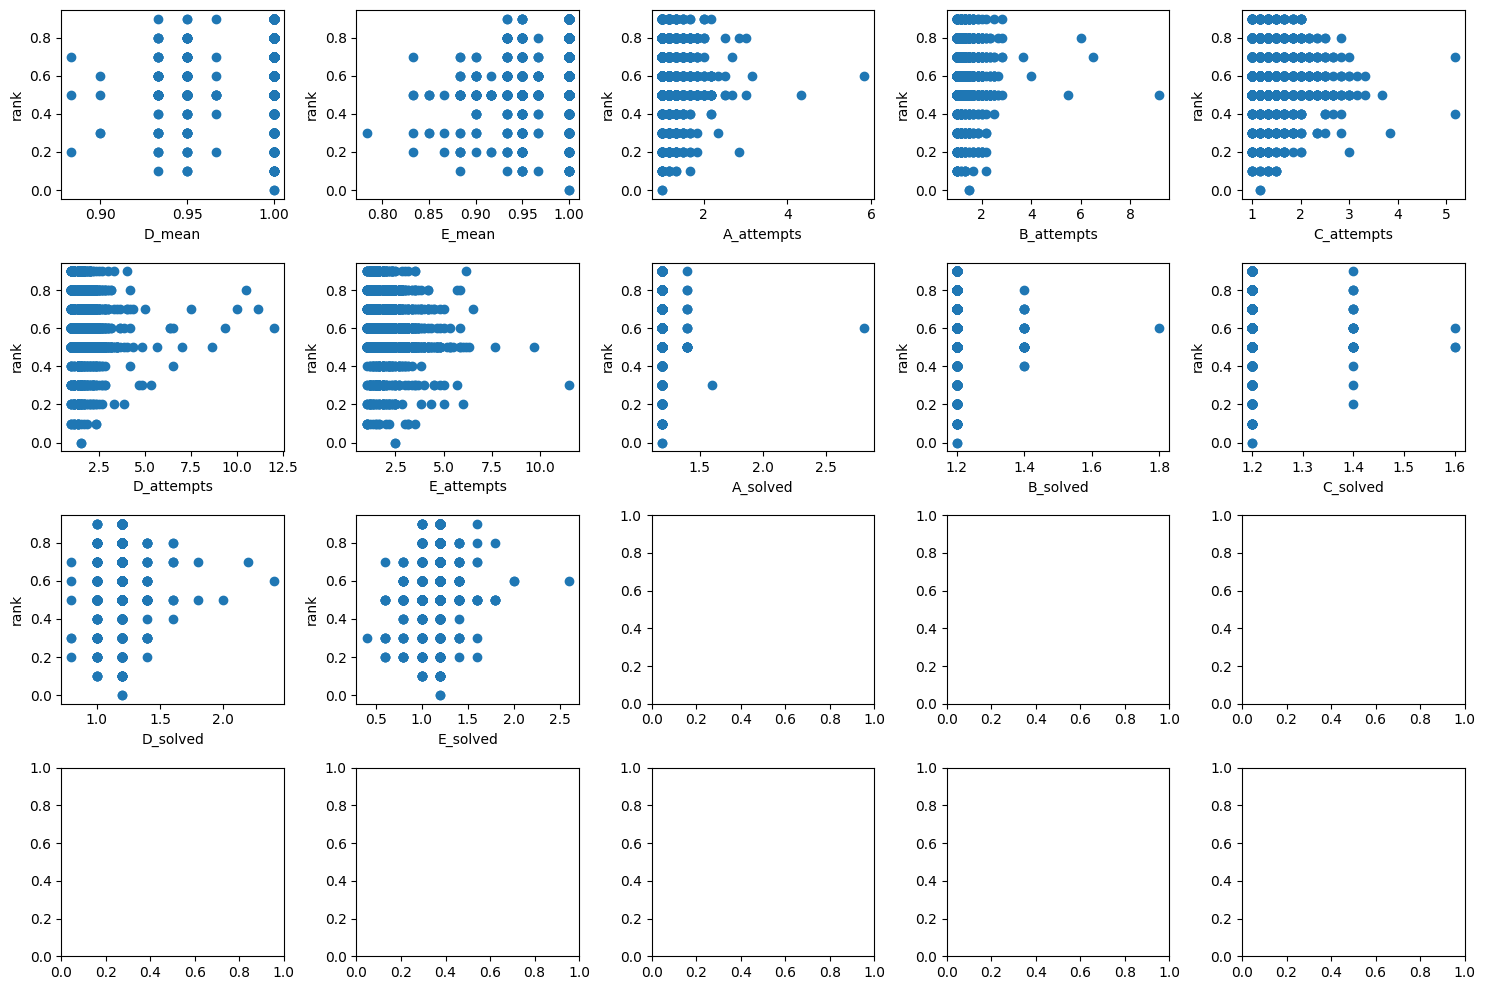

In [ ]:
import matplotlib.pyplot as plt

features = [ 'D_mean', 'E_mean', 
            'A_attempts', 'B_attempts', 'C_attempts', 'D_attempts', 'E_attempts', 'A_solved', 'B_solved',
            'C_solved', 'D_solved', 'E_solved']

# Create scatter plots for each feature against the rank
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for i, feature in enumerate(features):
    row = i // 5
    col = i % 5
    axs[row, col].scatter(df[feature], df['rank'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('rank')

plt.tight_layout()
plt.show()

# encode decimal labels and split data

In [ ]:
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(Y)
print(encoded_y)

[5 8 9 ... 8 6 5]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, stratify=encoded_y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25)
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([  2,  10,  31,  48,  40, 606, 391, 203, 214,  54]))


In [ ]:
from sklearn import svm,tree
from sklearn.ensemble import RandomForestClassifier

svm.SVC 

sklearn.svm._classes.SVC

In [ ]:
_hyperparameters = {
    #will use gridsearch to look for best hyperpraramets
}
estimator = svm.SVC(**_hyperparameters)
_ = estimator.fit(x_train, y_train)
_train_predictions  = estimator.predict(x_valid)
_report = metrics.classification_report(y_valid,_train_predictions )
print(_report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        11
           5       0.36      0.99      0.53       195
           6       0.00      0.00      0.00       122
           7       0.00      0.00      0.00        58
           8       0.00      0.00      0.00        87
           9       0.00      0.00      0.00        31

    accuracy                           0.36       533
   macro avg       0.04      0.11      0.06       533
weighted avg       0.13      0.36      0.20       533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ["rbf","sigmnoid"]} 

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.378 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.381 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.378 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.378 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.379 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=1, kernel=sigmnoid;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=sigmnoid;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=sigmnoid;, score=nan total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=sigmnoid;, score=nan total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=sigmnoid;, score=nan total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.378 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.381 total time=   0.2s
[CV 3/5] END ......C=0.1, ga

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmnoid']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
_hyperparameters = {
'C': 0.01, 'gamma': 1}
estimator = svm.SVC(**_hyperparameters)
_ = estimator.fit(x_train, y_train)
_train_predictions  = estimator.predict(x_valid)
_report = metrics.classification_report(y_valid,_train_predictions )
print(_report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        11
           5       0.37      1.00      0.54       195
           6       0.00      0.00      0.00       122
           7       0.00      0.00      0.00        58
           8       0.00      0.00      0.00        87
           9       0.00      0.00      0.00        31

    accuracy                           0.37       533
   macro avg       0.04      0.11      0.06       533
weighted avg       0.13      0.37      0.20       533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# applying an oversampling techinuqe called SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
sm =SMOTE(sampling_strategy="auto", k_neighbors=1)
x_sm, y_sm = sm.fit_resample(x_train,y_train)


In [ ]:
print(x_sm.shape)
x_sm.head()
x_sm_train, x_sm_valid, y_sm_train, y_sm_valid = train_test_split(x_sm, y_sm, test_size=0.25)
print(x_sm_train.shape)
print(y_sm_train)

(6060, 20)
(4545, 20)
[4 7 0 ... 2 5 2]


In [ ]:
_hyperparameters = {
    
}
final_estimator = svm.SVC(**_hyperparameters)
_ = final_estimator.fit(x_sm_train, y_sm_train)
_train_predictions  = final_estimator.predict(x_sm_valid)
_report = metrics.classification_report(_train_predictions ,y_sm_valid)
print(_report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       180
           1       0.92      0.69      0.79       223
           2       0.66      0.56      0.61       172
           3       0.39      0.55      0.45       115
           4       0.62      0.56      0.59       168
           5       0.09      0.39      0.14        33
           6       0.10      0.25      0.15        59
           7       0.28      0.37      0.32       110
           8       0.16      0.34      0.22        67
           9       0.74      0.26      0.39       388

    accuracy                           0.50      1515
   macro avg       0.50      0.49      0.46      1515
weighted avg       0.65      0.50      0.54      1515



In [ ]:

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ["rbf"]} 

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_sm_train, y_sm_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.442 total time=   1.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.426 total time=   2.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.460 total time=   1.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.440 total time=   1.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.420 total time=   3.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.255 total time=   1.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.241 total time=   2.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.254 total time=   2.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.261 total time=   2.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.234 total time=   1.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.113 total time=   1.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

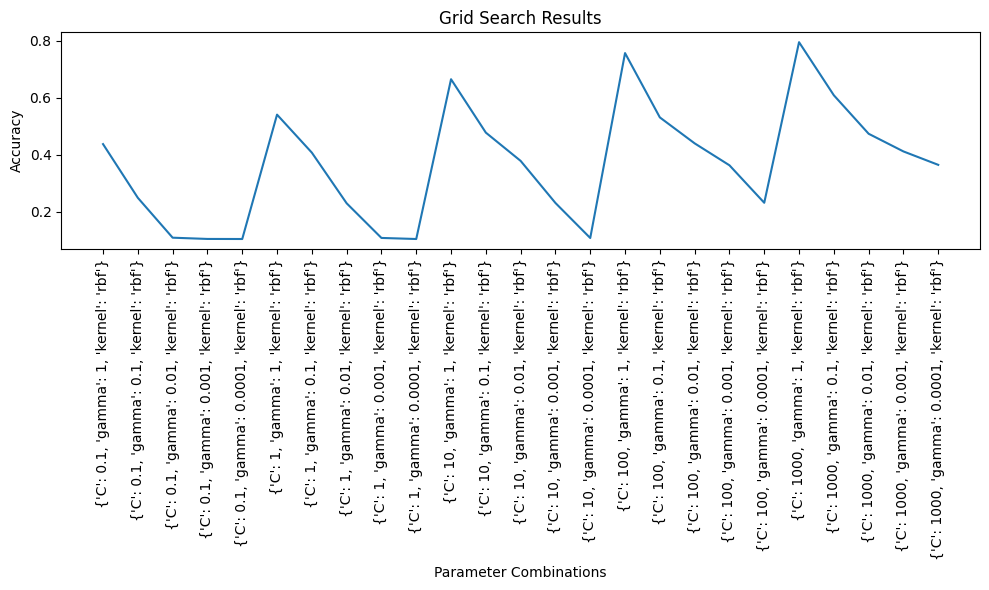

In [ ]:
import matplotlib.pyplot as plt

# Extract parameter combinations and scores
param_combinations = grid.cv_results_['params']
mean_scores = grid.cv_results_['mean_test_score']

# Extract individual parameter values
C_values = [params['C'] for params in param_combinations]
gamma_values = [params['gamma'] for params in param_combinations]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_scores)
plt.xticks(range(len(mean_scores)), param_combinations, rotation='vertical')
plt.xlabel('Parameter Combinations')
plt.ylabel('Accuracy')
plt.title('Grid Search Results')
plt.tight_layout()
plt.show()


In [ ]:
final_prediction = final_estimator.predict(x_test)
print(final_prediction)
print(y_test)

[8 3 2 9 7 2 6 4 9 8 8 8 1 9 9 4 8 5 2 9 7 7 2 6 9 7 8 6 9 6 4 9 0 2 8 8 7
 9 7 1 9 9 3 6 3 9 8 8 4 4 8 9 9 7 9 8 4 9 9 9 3 9 9 0 3 8 5 1 7 2 1 8 2 9
 5 1 0 8 2 8 9 7 8 6 9 3 4 4 4 4 9 9 9 7 9 8 2 9 9 9 3 4 2 7 9 9 9 8 2 9 7
 8 2 8 6 9 3 1 9 8 3 1 7 9 9 9 4 5 9 7 9 9 1 4 3 4 3 2 5 4 4 4 5 9 1 9 7 9
 6 1 9 1 4 1 9 0 3 1 4 1 9 3 1 2 9 9 8 4 5 8 8 2 2 9 4 4 9 3 4 9 9 2 1 9 3
 4 5 5 5 8 6 1 8 2 6 2 9 1 2 4 4 9 4 9 4 9 1 3 8 8 9 9 5 7 7 8 1 6 5 3 4 5
 7 9 4 9 9 8 3 9 8 7 8 4 9 8 9 4 4 9 7 2 9 3 6 7 3 4 3 5 6 9 7 9 8 5 8 6 3
 5 1 3 8 8 7 9 8 9 5 5 1 8 4 9 4 3 4 3 6 4 9 9 9 7 6 7 9 9 9 8 7 9 1 9 9 1
 7 4 9 5 1 6 9 8 2 1 6 2 9 3 2 8 9 8 2 2 5 9 4 0 8 7 9 3 9 8 2 1 7 8 4 9 7
 7 4 4 2 6 5 2 6 3 1 9 7 5 9 1 6 9 4 1 1 9 1 0 4 4 4 8 9 7 9 4 9 2 3 4 3 9
 7 3 1 3 3 8 4 6 4 9 8 6 6 9 3 3 1 6 9 0 3 9 6 9 6 6 9 0 3 8 9 2 4 4 8 4 4
 9 2 3 8 7 4 5 3 9 4 3 8 3 1 5 8 3 0 1 9 8 3 9 9 1 8 8 4 9 8 1 1 4 9 2 7 5
 9 0 6 6 6 7 3 1 9 9 3 1 9 6 6 2 9 8 5 9 9 3 2 9 9 9 4 9 0 9 2 9 2 6 3 8 8
 4 6 5 2 5 3 9 3 9 2 1 2 

In [ ]:
def compare_arrays(array1, array2):
    if len(array1) != len(array2):
        raise ValueError("Arrays must have the same length.")

    total_elements = len(array1)
    correct_matches = sum(a == b for a, b in zip(array1, array2))
    accuracy = correct_matches / total_elements * 100
    return accuracy



accuracy = compare_arrays(final_prediction, y_test)
print(f"The accuracy is: {accuracy}%")


The accuracy is: 10.299625468164795%





# trying to split the data into clusters 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init="auto").fit(df)
cluster_labels = kmeans.labels_

# Add the cluster labels to your DataFrame
df['Cluster'] = cluster_labels

# Split the data into separate DataFrames based on cluster labels
cluster_data = {}

for label in df['Cluster'].unique():
    cluster_data[label] = df[df['Cluster'] == label].drop('Cluster', axis=1)

for label, data in cluster_data.items():
    print(f"New Cluster {label}:")
    print(data)

New Cluster 0:
      A_mean  B_mean  C_mean  D_mean    E_mean  A_max  B_max  C_max  D_max  \
0          1       1       1     1.0  0.933333      1      1      1      1   
3          1       1       1     1.0  1.000000      1      1      1      1   
5          1       1       1     1.0  1.000000      1      1      1      1   
9          1       1       1     1.0  1.000000      1      1      1      1   
11         1       1       1     1.0  1.000000      1      1      1      1   
...      ...     ...     ...     ...       ...    ...    ...    ...    ...   
2656       1       1       1     1.0  0.950000      1      1      1      1   
2657       1       1       1     1.0  1.000000      1      1      1      1   
2660       1       1       1     1.0  1.000000      1      1      1      1   
2662       1       1       1     1.0  0.950000      1      1      1      1   
2663       1       1       1     1.0  1.000000      1      1      1      1   

      E_max  ...  B_attempts  C_attempts  D_atte

In [ ]:
for label, data in cluster_data.items():
    rank_counts = data['rank'].value_counts()
    print(f"Cluster {label}:")
    print(rank_counts)
    print(data.shape)
    print()


Cluster 0:
0.5    262
0.6    122
0.7     70
0.8     49
0.3     19
0.4     19
0.9      9
0.2      7
0.1      4
Name: rank, dtype: int64
(561, 21)

Cluster 1:
0.5    740
0.6    519
0.8    328
0.7    257
0.9     98
0.3     58
0.2     45
0.4     45
0.1     13
0.0      2
Name: rank, dtype: int64
(2105, 21)



In [ ]:
clean_data = cluster_data[0]
Y_clustered = clean_data.loc[:, "rank"]
X_clustered = clean_data.drop("rank",axis=1)

clustered_encoded_y = encoder.fit_transform(Y_clustered)

x_clustered_train, x_clustered_test, y_clustered_train, y_clustered_test = train_test_split(X_clustered, clustered_encoded_y, test_size=0.2)
print(x_clustered_train.shape)
print(x_clustered_test.shape)


(448, 20)
(113, 20)


In [ ]:
_hyperparameters = {
'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'    
}
estimator = svm.SVC(**_hyperparameters)
_ = estimator.fit(x_clustered_train, y_clustered_train)
_train_predictions  = estimator.predict(x_clustered_test)
_report = metrics.classification_report(_train_predictions ,y_clustered_test)
print(_report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.47      0.64       113
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.47       113
   macro avg       0.14      0.07      0.09       113
weighted avg       1.00      0.47      0.64       113



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# classifying with neural networks



## loading data into tensors and then aplitting them into batches

In [ ]:



x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(X, encoded_y, test_size=0.2, stratify=encoded_y)

x_train_tensor = torch.tensor(x_train_nn.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_nn, dtype=torch.long)

train_dataset = utils.data.TensorDataset(
    x_train_tensor,
    y_train_tensor
)
train_dataloader = utils.data.DataLoader(
    train_dataset,
    batch_size=50,
    shuffle=True
)
print(y_train_tensor.shape)


torch.Size([2132])


## created custom neural network

In [ ]:
model = nn.Sequential(
    #first layer
    nn.Linear(20, 50),
    nn.Sigmoid(),
    nn.Dropout(0.5),
    nn.BatchNorm1d(50),  
    #second layer
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.BatchNorm1d(50),  
    #third layer
    nn.Linear(50, 100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.BatchNorm1d(100),  
    #output
    nn.Linear(100, len(np.unique(y_train))) 
) 


## full neural netowrk implementation

Adjusting learning rate of group 0 to 1.0000e-02.
Adjusting learning rate of group 0 to 5.0000e-03.
Adjusting learning rate of group 0 to 2.5000e-03.
Adjusting learning rate of group 0 to 1.2500e-03.
Adjusting learning rate of group 0 to 6.2500e-04.
Adjusting learning rate of group 0 to 3.1250e-04.
Adjusting learning rate of group 0 to 1.5625e-04.
Adjusting learning rate of group 0 to 7.8125e-05.
Adjusting learning rate of group 0 to 3.9063e-05.
Adjusting learning rate of group 0 to 1.9531e-05.
Adjusting learning rate of group 0 to 9.7656e-06.
Adjusting learning rate of group 0 to 4.8828e-06.
Adjusting learning rate of group 0 to 2.4414e-06.
Adjusting learning rate of group 0 to 1.2207e-06.
Adjusting learning rate of group 0 to 6.1035e-07.
Adjusting learning rate of group 0 to 3.0518e-07.
Adjusting learning rate of group 0 to 1.5259e-07.
Adjusting learning rate of group 0 to 7.6294e-08.
Adjusting learning rate of group 0 to 3.8147e-08.
Adjusting learning rate of group 0 to 1.9073e-08.


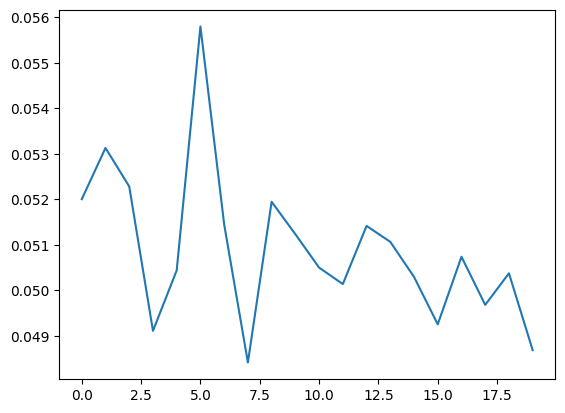

In [ ]:
loss_fn = nn.CrossEntropyLoss()  
optimizer = optim.SGD(model.parameters(), lr = 0.01 , momentum = 0.5)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer , 0.5 , verbose = True)
epochs = 20
ls=[]
model.train()  # Enable dropout during training

for epoch in range(epochs):
  total_loss = 0
  for batch_idx, (feature,label) in enumerate(train_dataloader):
      optimizer.zero_grad()      
      x= feature
      y=label
      z =  model(x)
      loss = loss_fn(z,y)
      loss.backward()            
      optimizer.step() 
      total_loss= loss.item()          
  ls.append(total_loss/len(train_dataloader))
  scheduler.step()

model.eval()  # Disable dropout during evaluation

plt.figure()
plt.plot(ls)


# test data

In [ ]:
import torch

test_features_tensor = torch.tensor(x_test_nn.values)
test_target_tensor = torch.tensor(y_test_nn)


    
test_dataset = utils.data.TensorDataset(
    test_features_tensor,
    test_target_tensor
)
test_dataloader = utils.data.DataLoader(
    test_dataset,
    batch_size=40,
    shuffle=False
)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define your model, loss function, optimizer, etc.

# Set the model to evaluation mode
model.eval()

# Initialize evaluation metrics
total_loss = 0
total_correct = 0
total_samples = 0

with torch.no_grad():
    for batch_idx, (features, labels) in enumerate(test_dataloader):
        x = features
        y = labels

        x = x.to(model[0].weight.dtype)

        # Forward pass
        outputs = model(x)
        loss = loss_fn(outputs, y)
        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

# Calculate average loss and accuracy
average_loss = total_loss / len(test_dataloader)
accuracy = 100 * total_correct / total_samples

# Print or use the evaluation metrics
print('Average Loss: {:.4f}'.format(average_loss))
print('Accuracy: {:.2f}%'.format(accuracy))


Average Loss: 2.0456
Accuracy: 37.83%


We also calculate the total number of correct predictions and total number of samples to compute the accuracy. Finally, we calculate the average loss and accuracy by dividing the total values by the number of batches or samples.